<a href="https://colab.research.google.com/github/Vasugi2003/DIABETICS-PREDICTION-USING-MACHINE-LEARNING/blob/main/DIABETICS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
df = pd.read_csv('/content/Diabetes.csv')

In [ ]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

<AxesSubplot:>

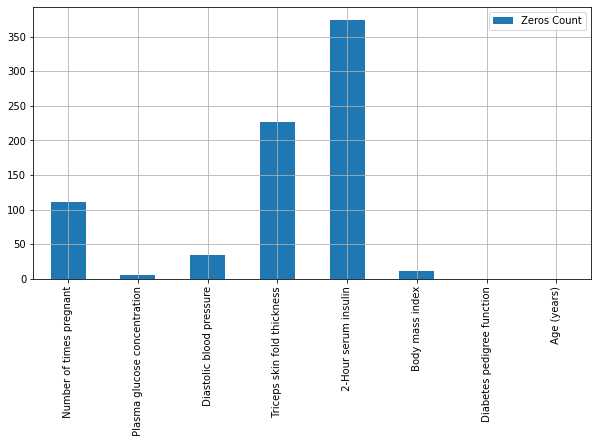

In [ ]:
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
z.columns=['Zeros Count']
z.drop(' Class variable',inplace=True)
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [ ]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [ ]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [ ]:
df.isnull().sum()

n_pregnant        0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

In [ ]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [ ]:


median_target('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [ ]:
median_target('glucose_conc')

,Output,glucose_conc
0,0,107.0
1,1,140.0


In [ ]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [ ]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [ ]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3
df.isnull().sum()

n_pregnant      0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

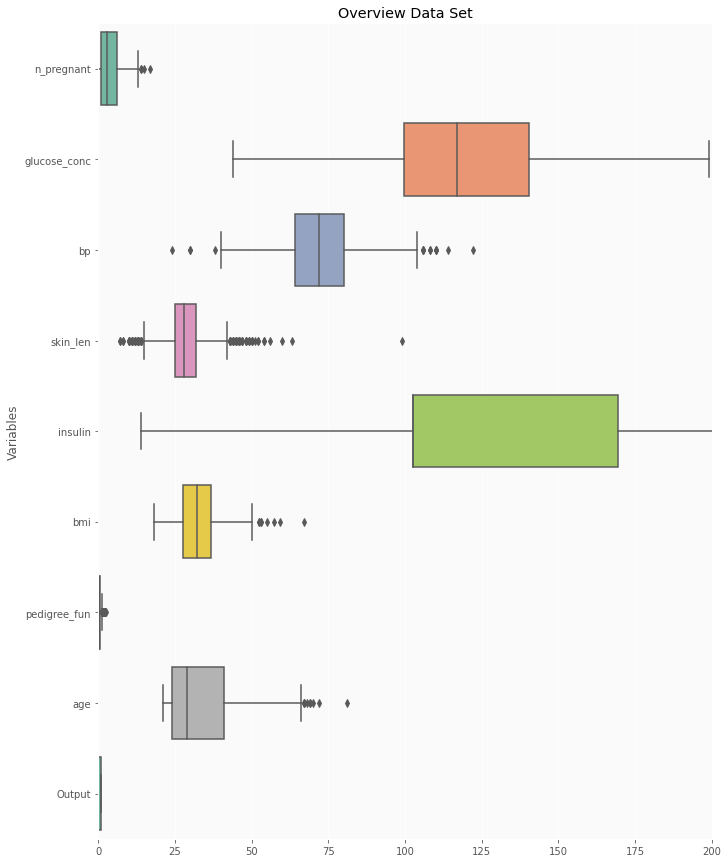

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df,
  orient = 'h',
  palette = 'Set2')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_pregnant'>

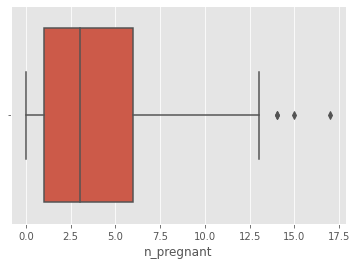

In [ ]:
sns.boxplot(df.n_pregnant)

In [ ]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: n_pregnant, dtype: int64

In [ ]:
median_target('n_pregnant')

,Output,n_pregnant
0,0,2.0
1,1,4.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4

In [ ]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: n_pregnant, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bp'>

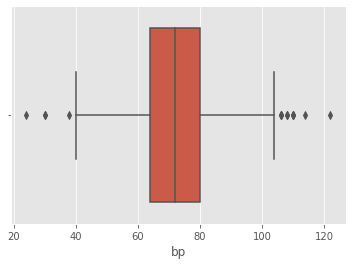

In [ ]:
sns.boxplot(df.bp)


In [ ]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5

In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bp'>

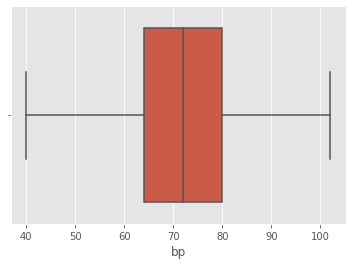

In [ ]:

sns.boxplot(df.bp)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skin_len'>

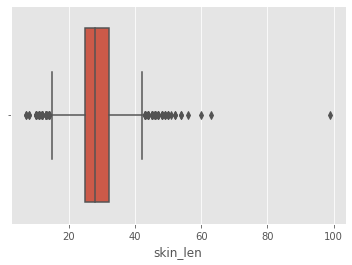

In [ ]:
sns.boxplot(df.skin_len)

In [ ]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32

In [ ]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

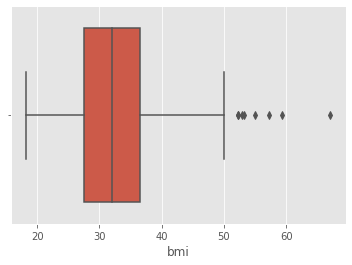

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pedigree_fun'>

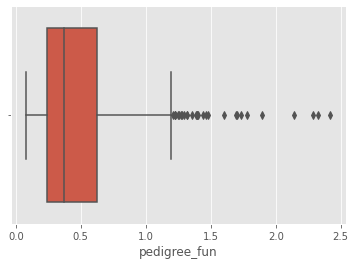

In [ ]:
sns.boxplot(df.pedigree_fun)

In [ ]:
median_target('pedigree_fun')

,Output,pedigree_fun
0,0,0.336
1,1,0.449


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

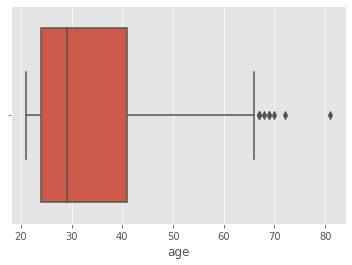

In [ ]:
sns.boxplot(df.age)

In [ ]:
median_target('age')

,Output,age
0,0,27.0
1,1,36.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

In [ ]:
X = df.drop(['Output'], 1)
y = df['Output']

<ipython-input-40-f05757b13d74>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Output'], 1)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.9155844155844156

In [ ]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [ 5, 42]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.84      0.89      0.87        47

    accuracy                           0.92       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.92      0.92      0.92       154



AUC: 0.91


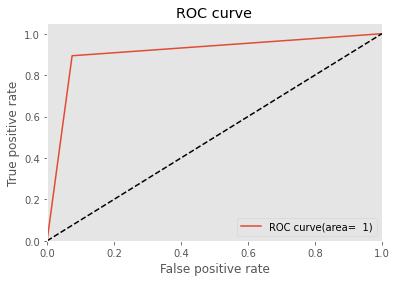

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [ ]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [ 5, 42]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



ROC AUC: 0.90


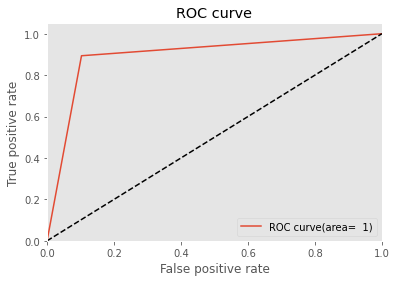

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
regressor=LogisticRegression()

In [ ]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8311688311688312

In [ ]:
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [13, 34]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.72      0.72      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154



ROC AUC: 0.80


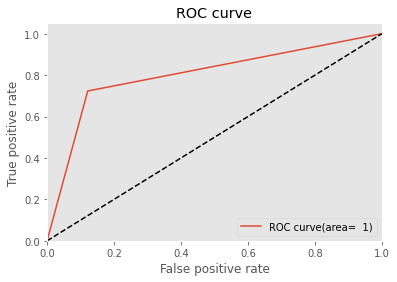

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))

0.8961038961038961


In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [ ]:
confusion_matrix(y_test,y_pred)

array([[95, 12],
       [ 4, 43]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       107
           1       0.78      0.91      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.91      0.90      0.90       154



ROC AUC: 0.90


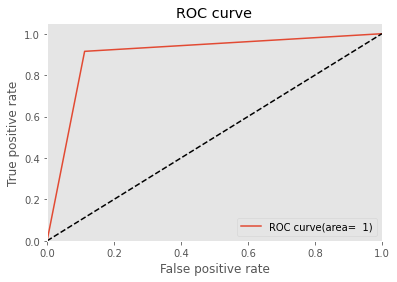

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Y_pred=classifier.predict(x_test)
confusion_matrix(y_test,Y_pred)

array([[99,  8],
       [ 2, 45]])

In [ ]:
accuracy_score(y_test,Y_pred)

0.935064935064935

In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       107
           1       0.85      0.96      0.90        47

    accuracy                           0.94       154
   macro avg       0.91      0.94      0.93       154
weighted avg       0.94      0.94      0.94       154



ROC AUC: 0.94


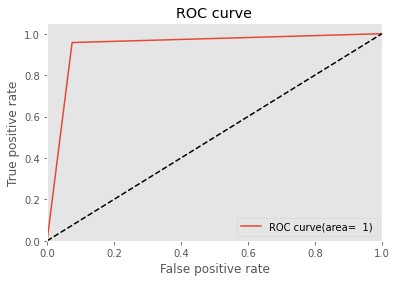

In [ ]:
fpr,tpr,_=roc_curve(y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))


In [ ]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8